Perceptronについて学ぶ

ANDゲートの実装をしてみる

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
AND(0,0)

0

In [4]:
AND(1,0)

0

In [5]:
AND(0,1)

0

In [6]:
AND(1,1)

1

重みとバイアスを導入してみる

In [11]:
import numpy as np

In [17]:
x = np.array([0,1]) #入力

In [18]:
w=np.array([0.5,0.5]) #重み

In [19]:
b=-0.7#バイアス

In [20]:
w*x

array([ 0. ,  0.5])

In [21]:
np.sum(w*x)

0.5

In [22]:
np.sum(w*x) + b 

-0.19999999999999996

この方式を利用してANDの実装

In [23]:
def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    tmp=np.sum(w*x)+b
    if tmp<0:
        return 0
    else:
        return 1

続いてNANDの実装

In [121]:
def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])#重みとバイアスのみANDと異なる
    b=0.7
    tmp=np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

ORの実装

In [25]:
def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5]) #重みとバイアスのみANDと異なる
    b=-0.2
    tmp =np.sum(w*x)+b
    if tmp<0:
        return 0
    else:
        return 1

AND、NAND、ORは同じ構造のパーセプトロンであり、違いは重みパラメータだけである。NANDとORゲートの実装においてもANDと異なる箇所は重みとバイアスの値を設定する箇所だけとなる。

<パーセプトロンの限界>　XORゲートについてグラフ化して考察する。今下記のグラフにおいてXORゲートの出力である●と■の点を一本の直線が分断している。

In [113]:
matplotlib inline

In [114]:
import matplotlib.pyplot as plt

In [115]:
pointx=[0,  1]
pointy=[0,  1]
pointx2=[0, 1]
pointy2=[1, 0]

In [116]:
#numpy内のaraneメゾットを活用して値の変域と刻みを設定
z=np.arange(-3,5,0.1)
t=-z+0.5

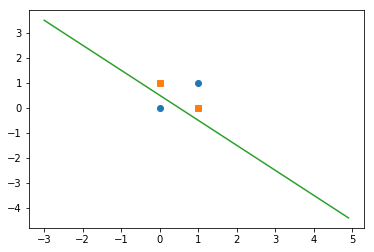

In [117]:
plt.plot(pointx,pointy,'o')
plt.plot(pointx2,pointy2,'s')
plt.plot(z,t)
plt.show()

図で示されるパーセプトロンはy=-x+0.5の直線で分断された2つの領域を表している。
直線の下方は0、上方は1を出力する。パーセプトロンの限界は１本の直線で分けた領域だけしか表現できない点にある。
グラフでは●と■を分けることはできないことが示されている。

しかしパーセプトロンの利点は層を重ねることができる点にある。
単層のパーセプトロンは非線形領域は分離できないが複層にすることでXORゲートの実現は可能である。以下にXORゲートの実装を示す。

In [122]:
def XOR(x1,x2):
    s1=NAND(x1,x2)
    s2=OR(x1,x2)
    y=AND(s1,s2)
    return y

In [123]:
XOR(0,0)

0

In [124]:
XOR(1,0)

1

In [125]:
XOR(0,1)

1

In [126]:
XOR(1,1)

0

このように多層パーセプトロンの実装は行われる。